# **<h3 align="center">Machine Learning - Project</h3>**
## **<h3 align="center">7. Flat Modeling: Baseline Predictions </h3>**
### **<h3 align="center">Group 30 - Project</h3>**


### Group Members
| Name              | Email                        | Student ID |
|-------------------|------------------------------|------------|
| Alexandra Pinto   | 20211599@novaims.unl.pt      | 20211599   |
| Gonçalo Peres     | 20211625@novaims.unl.pt      | 20211625   |
| Leonor Mira       | 20240658@novaims.unl.pt      | 20240658   |
| Miguel Natário    | 20240498@novaims.unl.pt      | 20240498   |
| Nuno Bernardino   | 20211546@novaims.unl.pt      | 20211546   |


---

### **7. Flat Modeling: Baseline Predictions Notebook**  
**Description:**  
This notebook focuses on a baseline approach for the classification task without hierarchical modeling. It serves as a **benchmark** to compare the performance of the hierarchical classification pipeline.  

Key steps include:  
- **Modeling Flat Classification:** Train a single-level classification model to predict the target variable directly without splitting into sub-levels.  
- **Feature Engineering:** Utilize the same preprocessed and encoded datasets as in the hierarchical models to ensure consistency.  
- **Model Training:** Evaluate multiple models (e.g., Logistic Regression, Random Forest, XGBoost, Neural Networks) to identify the best-performing approach.  
- **Evaluation:** Assess performance using metrics like accuracy, F1-score, precision, recall, and confusion matrices.  
- **Output:** Save the predictions from the best-performing flat model for comparison with hierarchical outputs.  

This notebook provides a comprehensive baseline model that simplifies the task and highlights the performance trade-offs compared to the hierarchical classification framework.  

---

<a id = "toc"></a>

## Table of Contents
* [1. Import the Libraries](#chapter1)
* [2. Load and Prepare Datasets](#chapter2)
* [3. Setting the Target](#chapter3)
* [4. Feature Selection](#chapter4)
    * [4.1. Preparing the Data](#section_4_1)  
    * [4.2. Numerical Features](#section_4_2) 
        * [4.2.1. LASSO Regression](#section_4_2_1)
        * [4.2.2. Recursive Feature Elimination - RFE](#section_4_2_2)
        * [4.2.3. Feature Importance - Decision Tree](#section_4_2_3)
        * [4.2.4. Feature Importance - Random Forest](#section_4_2_4)
    * [4.3. Categorical Features](#section_4_3)
        * [4.3.1. $\chi ^2$ Test for Independence](#section_4_3_1)
        * [4.3.2. Mutual Information Criterion (MIC)](#section_4_3_2)
    * [4.4. Final Features](#section_4_4)
* [5. Modelling](#chapter5)
  * [5.1. Simple Models](#section_5_1)
    * [5.1.1. Logistic Regression](#section_5_1_1)
    * [5.1.2. Decision Trees](#section_5_1_2)
    * [5.1.3. Random Forest](#section_5_1_3)
    * [5.1.4. XGBoost](#section_5_1_4)

# 1. Import the Libraries 📚<a class="anchor" id="chapter1"></a>

[Back to ToC](#toc)<br>

In [2]:
# --- Standard Libraries ---
import pandas as pd
import numpy as np
import pickle
import time

# --- Scikit-Learn Modules for Data Partitioning and Preprocessing ---
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Wrapper Methods and Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb

# Embedded Methods
from sklearn.linear_model import LassoCV

# --- Warnings ---
import warnings
warnings.filterwarnings('ignore')


#Import from utils the used functions
from utils import plot_importance, cor_heatmap, find_optimal_features_with_rfe, compare_rf_feature_importances
from utils import compare_feature_importances, select_high_score_features_chi2_no_model, select_high_score_features_MIC, metrics

In this topic we will also import the pre-saved feature categories dictionary from Notebook 3, ensuring consistency in feature grouping for feature selection and modeling.

In [3]:
# Load the feature categories dictionary
feature_categories_file = "feature_categories.pkl"
with open(feature_categories_file, "rb") as file:
    feature_categories = pickle.load(file)

# 2. Load and Prepare Datasets 📁<a class="anchor" id="chapter2"></a>

[Back to ToC](#toc)<br>

Now that we preprocessed the dataset in notebook 3. we will upload those datasets

In [4]:
#Import the datasets
X_train = pd.read_csv("../processed_datasets/X_train_model.csv", index_col="Claim Identifier")
X_val = pd.read_csv("../processed_datasets/X_val_model.csv", index_col="Claim Identifier")
df_test = pd.read_csv("../processed_datasets/df_test_model.csv", index_col="Claim Identifier")

In [5]:
X_train.head(2)

,Age at Injury,IME-4 Count,Agreement Reached,Income_Category,Accident_Quarter,Accident_Year,Accident Day,Age Group,promptness_category,promptness_C2_category,...,Industry Code_freq,County of Injury_freq,District Name_freq,WCIO Cause of Injury Code_freq,WCIO Nature of Injury Code_freq,WCIO Part Of Body Code_freq,Carrier Name_freq,Body_Part_Category_freq,Injury_Nature_Category_freq,Carrier Type Merged_freq
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6099734,67,4.0,0.0,1,3,2022,3,1,3,3,...,34856,34897,216798,9648,44601,38469,11544,96343,404174,228492
5796182,30,0.0,0.0,1,3,2021,5,2,7,7,...,34856,13901,68763,6081,88312,15038,11163,96343,404174,228492


In [6]:
X_val.head(2)

,Age at Injury,IME-4 Count,Agreement Reached,Income_Category,Accident_Quarter,Accident_Year,Accident Day,Age Group,promptness_category,promptness_C2_category,...,Industry Code_freq,County of Injury_freq,District Name_freq,WCIO Cause of Injury Code_freq,WCIO Nature of Injury Code_freq,WCIO Part Of Body Code_freq,Carrier Name_freq,Body_Part_Category_freq,Injury_Nature_Category_freq,Carrier Type Merged_freq
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5730729,52,1.0,0.0,4,2,2021,1,0,7,7,...,73733,42680,216798,23476,122811,15038,88862.0,96343,404174,88862
6038049,28,0.0,0.0,1,2,2022,5,2,1,1,...,21175,42680,216798,8659,4398,6314,88862.0,45491,404174,88862


We will also upload the y train and y_val.

In [7]:
# Load the arrays
y_train = np.load("../processed_datasets/y_train_preprocessed.npy", allow_pickle=True)
y_val =  np.load("../processed_datasets/y_val_preprocessed.npy", allow_pickle=True)

In [8]:
y_train

array(['4. TEMPORARY', '3. MED ONLY', '2. NON-COMP', ..., '4. TEMPORARY',
       '2. NON-COMP', '2. NON-COMP'], dtype=object)

In [9]:
y_val

array(['2. NON-COMP', '2. NON-COMP', '4. TEMPORARY', ..., '3. MED ONLY',
       '4. TEMPORARY', '2. NON-COMP'], dtype=object)

In [10]:
df_test.shape

(387975, 29)

# 3. Setting the Target <a class="anchor" id="chapter3"></a>
[Back to ToC](#toc)<br>

In this notebook, we will work with the standard dataset without implementing hierarchical modeling. As part of this process, we will encode the target variables `y_train` and `y_val` into numerical format to ensure compatibility with machine learning models. The encoded target variables will be stored in `y_train_encoded` and `y_val_encoded` for further use.

**Encoding the Target**

In [11]:
# Create a LabelEncoder instance
encoder = LabelEncoder()

# Encode y_train_new and y_val_new
y_train_encoded = encoder.fit_transform(y_train)  # Fit and transform on y_train_mapped
y_val_encoded = encoder.transform(y_val)  # Only transform on y_train_mapped

In [12]:
# Verify that the target is encoded 
print(f'{y_train_encoded}')
y_val_encoded

[3 2 1 ... 3 1 1]


array([1, 1, 3, ..., 2, 3, 1])

# 4. Feature Selection <a class="anchor" id="chapter4"></a>

[Back to ToC](#toc)<br>


The feature selection process involves summarizing the essential features in the dataset to help the model focus on the most relevant information. Here, we assess the categorical and numerical variables in `X_train` by examining unique values, descriptive statistics, and verifying the correctness of categorical bins and continuous feature distributions.

In [13]:
# Displaying descriptive statistics for categorical features in the training dataset
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,459219.0,42.884970,12.952508,5.000000,33.0,42.00,53.0,82.0
IME-4 Count,459219.0,0.741481,1.913359,0.000000,0.0,0.00,0.0,25.0
Agreement Reached,459219.0,0.046468,0.210497,0.000000,0.0,0.00,0.0,1.0
Income_Category,459219.0,2.117887,1.205360,0.000000,1.0,2.00,3.0,4.0
Accident_Quarter,459219.0,2.485058,1.129401,1.000000,1.0,3.00,3.0,4.0
Accident_Year,459219.0,2020.822706,1.852020,1961.000000,2020.0,2021.00,2022.0,2023.0
Accident Day,459219.0,2.524671,1.828200,0.000000,1.0,2.00,4.0,6.0
Age Group,459219.0,1.337506,1.076315,0.000000,0.0,2.00,2.0,3.0
promptness_category,459219.0,4.370087,2.496478,0.000000,3.0,4.00,7.0,7.0
promptness_C2_category,459219.0,4.399069,2.505514,0.000000,3.0,4.00,7.0,7.0


In this section we will use the created dictionary in Notebook 3.

In [14]:
# Print summary
for category, features in feature_categories.items():
    print(f"{category.capitalize()} Features ({len(features)}):")
    print(features, "\n")

Categorical Features (6):
['Income_Category', 'Age Group', 'promptness_category', 'promptness_C2_category', 'promptness_C3_category', 'Industry Risk'] 

Binary Features (5):
['Gender_M', 'Gender_U', 'Medical Fee Region_II', 'Medical Fee Region_III', 'Medical Fee Region_UK'] 

Numerical Features (18):
['Age at Injury', 'IME-4 Count', 'Accident_Quarter', 'Accident_Year', 'Accident Day', 'Salary_Per_Dependent', 'Carrier_Name_Simplified_freq', 'Zip_Code_Simplified_freq', 'Industry Code_freq', 'County of Injury_freq', 'District Name_freq', 'WCIO Cause of Injury Code_freq', 'WCIO Nature of Injury Code_freq', 'WCIO Part Of Body Code_freq', 'Carrier Name_freq', 'Body_Part_Category_freq', 'Injury_Nature_Category_freq', 'Carrier Type Merged_freq'] 



## 4.1. Preparing Data</b> <a class="anchor" id="section_4_1"></a>

[Back to 4. Feature Selection](#chapter4)<br>


To perform feature selection techniques like Lasso, RFE, and feature importance, the numerical features must first be scaled. Scaling ensures that all features have a consistent range, which is particularly important for methods sensitive to feature magnitude.

In this step, we will use the StandardScaler to standardize the numerical features in the dataset. This scaling process will be applied to a temporary dataset containing only the numerical features, allowing us to focus on selecting the most relevant features effectively. The scaled dataset will then be used as input for feature selection techniques.

In [15]:
# Extract numerical features from the dictionary
numerical_features = feature_categories["numerical"]

# Initialize StandardScaler
num_scaler = StandardScaler()

# Scale numerical features in X_train
X_train[numerical_features] = num_scaler.fit_transform(X_train[numerical_features])

X_train_num_scaled= X_train[numerical_features]

# Scale numerical features in X_val
X_val[numerical_features] = num_scaler.transform(X_val[numerical_features])

X_val_num_scaled= X_val[numerical_features]

**Variance Check After Scaling**

After scaling, we check the variance of each scaled feature to confirm that the features have been scaled properly. Lower variance after scaling indicates that data is normalized and less affected by magnitude differences.

In [16]:
# Check variance of scaled data
X_train_num_scaled.var()

Age at Injury                      1.000002
IME-4 Count                        1.000002
Accident_Quarter                   1.000002
Accident_Year                      1.000002
Accident Day                       1.000002
Salary_Per_Dependent               1.000002
Carrier_Name_Simplified_freq       1.000002
Zip_Code_Simplified_freq           1.000002
Industry Code_freq                 1.000002
County of Injury_freq              1.000002
District Name_freq                 1.000002
WCIO Cause of Injury Code_freq     1.000002
WCIO Nature of Injury Code_freq    1.000002
WCIO Part Of Body Code_freq        1.000002
Carrier Name_freq                  1.000002
Body_Part_Category_freq            1.000002
Injury_Nature_Category_freq        1.000002
Carrier Type Merged_freq           1.000002
dtype: float64

The output shows the variance of each numerical column in the scaled training set. These values help validate that the scaling process has achieved a consistent data distribution across features.

 ## 4.2. Numerical Features</b> <a class="anchor" id="section_4_2"></a>
 [Back to 4. Feature Selection](#chapter4)<br>
 

### 4.2.1. LASSO Regression <a class="anchor" id="sub_section_4_2_1"></a>

 [Back to 4.2. Numerical Features](#section_4_2)<br>


 The LASSO (Least Absolute Shrinkage and Selection Operator) regression is used here for feature selection by fitting a model to the standardized dataset and analyzing the coefficients.

In [17]:
# Fit regression
reg = LassoCV().fit(X_train_num_scaled, y_train_encoded)
#get coefficients
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
# Sort coefficients to observe importance
coef.sort_values()

Carrier Type Merged_freq          -0.070098
Carrier_Name_Simplified_freq      -0.056099
Accident_Year                     -0.036181
District Name_freq                -0.033425
Accident_Quarter                  -0.011435
Zip_Code_Simplified_freq          -0.007541
Accident Day                      -0.005255
Industry Code_freq                -0.003746
WCIO Nature of Injury Code_freq    0.029769
WCIO Cause of Injury Code_freq     0.039905
Salary_Per_Dependent               0.041949
County of Injury_freq              0.044895
WCIO Part Of Body Code_freq        0.057676
Age at Injury                      0.064119
Body_Part_Category_freq            0.069859
Carrier Name_freq                  0.079071
Injury_Nature_Category_freq        0.080523
IME-4 Count                        0.470204
dtype: float64

This function generates a horizontal bar plot of the feature importance values derived from the LASSO model, helping to visualize which features are prioritized by the model.

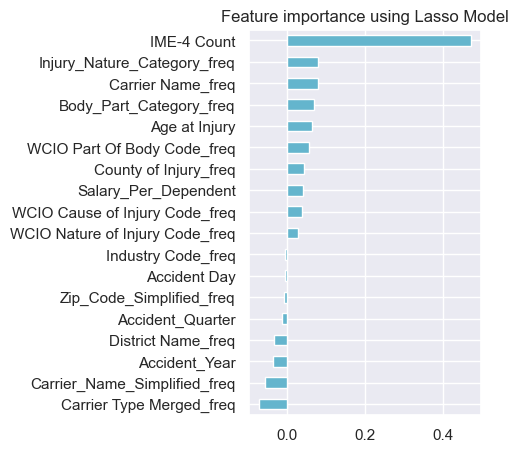

In [18]:
plot_importance(coef,'Lasso')

Let's consider all the values above 0.015.

 ### 4.2.2. Recursive Feature Elimination - RFE <a class="anchor" id="sub_section_4_2_2"></a>

  [Back to 4.2. Numerical Features](#section_4_2)<br>
 

RFE is employed here to further validate the important features as identified by LASSO. By sequentially removing the least important features, RFE helps to refine the feature set.

The selected features after RFE likely overlap with those identified by LASSO, suggesting consistency in feature importance.
Using both LASSO and RFE provides a more robust feature selection by cross-validating the importance of individual features.

This block of code performs RFE to identify the best subset of features by iterating over a range of feature numbers. The code aims to maximize model performance on the validation set.

In [19]:
# RFE using Logistic Regression
model = LogisticRegression()

#Use the function defined in utils.py
best_features, best_score, scores = find_optimal_features_with_rfe(
    model, 
    X_train_num_scaled, 
    y_train_encoded, 
    X_val_num_scaled, 
    y_val_encoded,
    max_features=19
)

Optimum number of features: 17
F1 Macro Score with 17 features: 0.189736



The loop evaluates models with 1 to 18 features, tracking the score for each.

The output indicates that 3 features yielded the highest validation f1_score score of 0.369795.

**Applying RFE with the Optimal Number of Features**

Once the optimal number of features is identified, the RFE model is finalized with this configuration.

In [20]:
#rfscv- to select 1st the number of features we should select
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 3)

In [21]:
X_rfe= rfe.fit_transform(X=X_train_num_scaled, y=y_train_encoded)

This shows the results of the feature selection process, listing the features selected by RFE. The code snippet confirms which features were selected as relevant by the RFE model and displays them in a boolean Series, where True indicates the feature was selected and False means it was not.

In [22]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

Age at Injury                      False
IME-4 Count                         True
Accident_Quarter                   False
Accident_Year                      False
Accident Day                       False
Salary_Per_Dependent               False
Carrier_Name_Simplified_freq       False
Zip_Code_Simplified_freq           False
Industry Code_freq                 False
County of Injury_freq              False
District Name_freq                 False
WCIO Cause of Injury Code_freq     False
WCIO Nature of Injury Code_freq     True
WCIO Part Of Body Code_freq        False
Carrier Name_freq                  False
Body_Part_Category_freq             True
Injury_Nature_Category_freq        False
Carrier Type Merged_freq           False
dtype: bool

### 4.2.3. Feature Importance - Decision Tree <a class="anchor" id="sub_section_4_2_3"></a>
 [Back to 4.2. Numerical Features](#section_4_2)<br>



In [23]:
from utils import compare_feature_importances

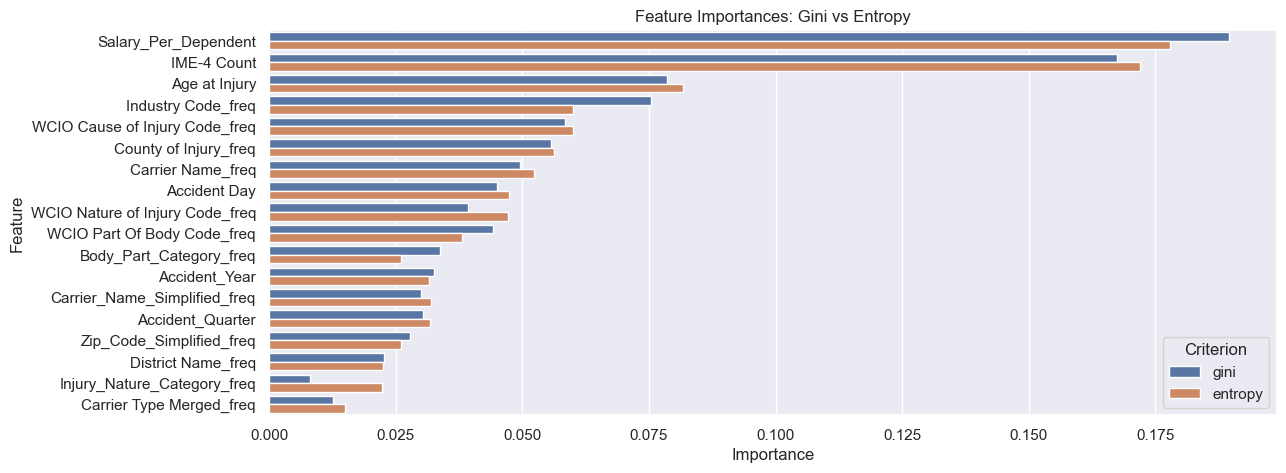

       gini   entropy               col
0  0.078471  0.081780     Age at Injury
1  0.167361  0.171940       IME-4 Count
2  0.030274  0.031807  Accident_Quarter
3  0.032481  0.031635     Accident_Year
4  0.044886  0.047293      Accident Day


In [24]:
# Call the function with your training data
zippy = compare_feature_importances(X_train_num_scaled, y_train_encoded)

# Access the DataFrame for further analysis if needed
print(zippy.head())

### 4.2.4. Feature Importance - Random Forest <a class="anchor" id="sub_section_4_2_4"></a>

 [Back to 4.2. Numerical Features](#section_4_2)<br>


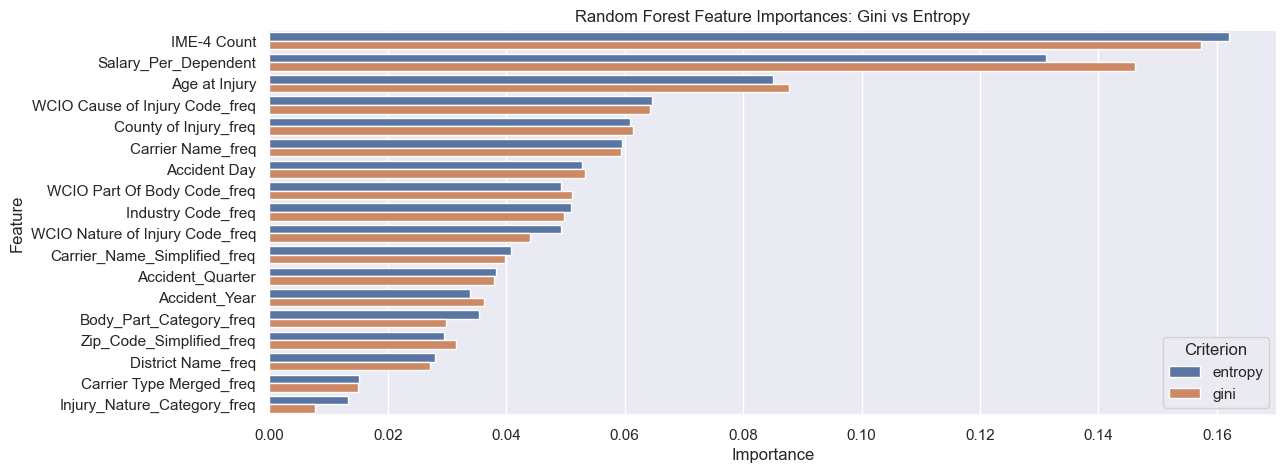

       gini   entropy               col
0  0.087757  0.085109     Age at Injury
1  0.157387  0.162005       IME-4 Count
2  0.037933  0.038286  Accident_Quarter
3  0.036261  0.033961     Accident_Year
4  0.053356  0.052781      Accident Day


In [25]:
# Call the function with your training data
importances = compare_rf_feature_importances(X_train_num_scaled, y_train_encoded)

# Access the DataFrame for further analysis if needed
print(importances.head())

## 4.3. Categorical Features</b> <a class="anchor" id="section_4_3"></a>
[Back to 4. Feature Selection](#chapter4)<br>

Chi-squared and MIC for the categorical ones.

In [26]:
X_train_mic_chi2 = X_train[feature_categories['categorical'] + feature_categories['binary']]

In [27]:
X_train_mic_chi2.shape

(459219, 11)

In [28]:
X_train_mic_chi2.columns

Index(['Income_Category', 'Age Group', 'promptness_category',
       'promptness_C2_category', 'promptness_C3_category', 'Industry Risk',
       'Gender_M', 'Gender_U', 'Medical Fee Region_II',
       'Medical Fee Region_III', 'Medical Fee Region_UK'],
      dtype='object')

 ### 4.3.1. $\chi ^2$ Test for Independence <a class="anchor" id="sub_section_4_3_1"></a>

[Back to 4.3. Categorical Features](#section_4_3)<br>


The Chi-squared test helps us identify the most relevant categorical and binary features by evaluating their independence with the target variable. 

In [29]:
from utils import select_high_score_features_chi2_no_model

In [30]:
# Example usage
high_score_features_chi2, scores = select_high_score_features_chi2_no_model(
    X_train_mic_chi2, 
    y_train_encoded, 
    threshold=6
)

Top 6 features based on Chi-square scores: ['Income_Category', 'promptness_C3_category', 'promptness_category', 'promptness_C2_category', 'Age Group', 'Gender_M']
Corresponding Chi-square scores: [22994.311146633525, 17690.608801763363, 7073.780016219587, 6424.45803850985, 4266.366842167617, 1788.1577009239163]


In [31]:
high_score_features_chi2

['Income_Category',
 'promptness_C3_category',
 'promptness_category',
 'promptness_C2_category',
 'Age Group',
 'Gender_M']

 ### 4.3.2. Mutual Information Criterion (MIC) <a class="anchor" id="sub_section_4_3_2"></a>

 [Back to 4.3. Categorical Features](#section_4_3)<br>
 

The Mutual Information Criterion is used to measure the dependence between each feature and the target variable. By setting a threshold, we retain only the most relevant features.

In [32]:
from utils import select_high_score_features_MIC

In [33]:
# Example usage
high_score_features_MIC, scores_MIC = select_high_score_features_MIC(
    X_train_mic_chi2, 
    y_train_encoded, 
    threshold=6, 
    random_state=42)

Top 6 features based on MIC scores: ['promptness_C3_category', 'Income_Category', 'promptness_C2_category', 'Industry Risk', 'Gender_M', 'promptness_category']
Corresponding MIC scores: [0.13956777543925414, 0.11218480819104304, 0.05872388377400384, 0.033421802381012444, 0.03260363270931377, 0.03209211630864184]


In [34]:
X_train_mic_chi2.shape

(459219, 11)

In [35]:
high_score_features_MIC

['promptness_C3_category',
 'Income_Category',
 'promptness_C2_category',
 'Industry Risk',
 'Gender_M',
 'promptness_category']

**Intersection of Selected Features by Chi-squared and MIC** <br>
To identify the most relevant categorical features, we take the intersection of features selected by both Chi-squared and MIC methods.

In [36]:
# Find common features between Chi-squared and MIC selections
common_categorical_features = list(set(high_score_features_chi2).intersection(set(high_score_features_MIC)))
features_selected = common_categorical_features  # Final list of selected features
features_selected  # Display the list of intersected features

['Income_Category',
 'Gender_M',
 'promptness_category',
 'promptness_C3_category',
 'promptness_C2_category']

## 4.4. Final Features</b> <a class="anchor" id="section_4_4"></a>
[Back to 4. Feature Selection](#chapter4)<br>

The following table evaluates all numerical features using multiple feature selection techniques: Spearman Correlation, LASSO Regression, RFE, Decision Tree, and Random Forest. Based on these combined insights, a final decision is provided in the "What to do?" column.


| **Predictor**                 | **LASSO**         | **RFE**            | **Decision Tree Importance**   | **Random Forest Importance**  | **What to do?**               |
|-------------------------------|-------------------|--------------------|--------------------------------|--------------------------------|--------------------------------|
| Carrier Type Merged_freq      | Keep              | Discard               | Low                            | Low                          | Consider include in model                       |
| Carrier_Name_Simplified_freq  | Discard              | Discard               | Low                            | Low                            | Discard                       |
| Injury_Nature_Category_freq    | Keep           | Discard               | Keep                            | Low                            | Include                       |
| District Name_freq            | Discard           | Discard               | Low                            | Low                            | Discard                       |
| Accident_Quarter              | Discard           | Discard               | Low                            | Low                            | Discard                       |
| Accident_Year                 |Discard           | Discard               | Low                            | Low                            | Discard                       |
| Zip_Code_Simplified_freq      |Discard           | Discard               | Low                            | Low                            | Discard                       |
| WCIO Cause of Injury Code_freq| Discard           | Discard               | Low                           | Low                           | Discard              |
| Accident Day                  | Discard           | Discard             | Low                           | Low                            | Discard                       |
| Industry Code_freq            | Keep               | Discard              | Low                           | Low                            | Include                       |
| Body_Part_Category_freq       | Keep                | Keep               | Low                            | Keep                            | Include                       |
| WCIO Part Of Body Code_freq |  Discard           | Discard               | Low                            | Low                            | Discard                       |
| WCIO Nature of Injury Code_freq| Discard           | Keep               | Low                            | Low                            | Consider include in model                       |
| Carrier Name_freq             | Keep              | Discard               | Low                           | Low                           | Discard                       |
| Salary_Per_Dependent          | Keep              | Discard               | Keep                           | Keep                           | Include                       |
| County of Injury_freq         | Discard           | Discard               | Low                           | Low                           | Discard                       |
| Age at Injury                 | Keep              | Discard               | Keep                           | Keep                           | Include                       |
| IME-4 Count                   | Keep              | Keep               | Keep                           | Keep                           | Include                       |

### **Categorical Feature Selection Results**

The following table summarizes the decisions for each categorical feature based on **Mutual Information (MIC)** and **Chi-Squared** (X²) results. The retained features will be used in subsequent modeling to enhance predictive performance.

| **Feature**              | **X² Results**          | **MIC Results**         | **Decision**               |
|---------------------------|-------------------------|-------------------------|----------------------------|
| promptness_C2_category | Keep                  | Keep                  | Include               |
| promptness_category    | Keep                 | Keep                       | Include                |
| promptness_C3_category | Keep                       | Keep                  | Include                |
| Age Group              | Keep                  | Keep                  | Include                |
| Income_Category        | Keep                  | Keep                  | Include                |
| Industry Risk         |                        | Keep                  | Consider include in model                |
| Gender_M               | Keep                  | -                   | Consider include in model                |
| Gender_U               | -                       | -                       | Exclude          |
| Medical Fee Region_II  | -                       | -                       | Exclude               |
| Medical Fee Region_III | -                       | -                       | Exclude               |
| Medical Fee Region_UK  | -                       | -                       | Exclude                |


In [37]:
numerical_features

['Age at Injury',
 'IME-4 Count',
 'Accident_Quarter',
 'Accident_Year',
 'Accident Day',
 'Salary_Per_Dependent',
 'Carrier_Name_Simplified_freq',
 'Zip_Code_Simplified_freq',
 'Industry Code_freq',
 'County of Injury_freq',
 'District Name_freq',
 'WCIO Cause of Injury Code_freq',
 'WCIO Nature of Injury Code_freq',
 'WCIO Part Of Body Code_freq',
 'Carrier Name_freq',
 'Body_Part_Category_freq',
 'Injury_Nature_Category_freq',
 'Carrier Type Merged_freq']

In [38]:
final_features = [
    # Categorical features selected through MIC and chi2
    'Age Group', 'promptness_C3_category', 'promptness_category',
    'promptness_C2_category', 'Income_Category',
    # Important numerical features
    'Injury_Nature_Category_freq','Industry Code_freq', 'Body_Part_Category_freq',
    'Salary_Per_Dependent', 'Age at Injury', 'IME-4 Count']


# Extracting the final features from the processed datasets
X_train_final = X_train[final_features]
X_val_final = X_val[final_features]
X_test_final = df_test[final_features]

# Print the shape of the final datasets to confirm consistency
print(f"X_train_final shape: {X_train_final.shape}")
print(f"X_val_final shape: {X_val_final.shape}")
print(f"X_test_final shape: {X_test_final.shape}")

X_train_final shape: (459219, 11)
X_val_final shape: (114805, 11)
X_test_final shape: (387975, 11)


# 5. Modelling <a class="anchor" id="chapter5"></a>
[Back to ToC](#toc)<br>

In this section, we establish baseline predictions by training and evaluating four machine learning models on the full dataset. These models aim to predict the target variable without addressing class imbalance directly.

## 5.1. Simple Models </b> <a class="anchor" id="section_5_1"></a>

[Back to 5. Modelling](#chapter5)<br>

Simple models serve as the foundation for understanding the problem and establishing a baseline for performance. These algorithms are straightforward to implement and interpret, making them ideal for initial evaluations, even in imbalanced datasets. In this section, we explore Logistic Regression, Decision Trees, Random Forest and XGBoost classifiers.


### 5.1.1. Logistic Regression <a class="anchor" id="sub_section_5_1_1"></a>

[Back to 5.1. Simple Models](#section_5_1)<br>

Logistic Regression is a simple yet effective model for binary classification tasks. While not tailored for imbalanced datasets, it serves as a baseline to compare more sophisticated methods. while Logistic Regression might not be ideal for imbalanced data, it’s included in the analysis to serve as a benchmark and provide a simple, interpretable comparison point.

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.03      0.06      9980
           1       0.66      0.98      0.79    232862
           2       0.18      0.00      0.00     55125
           3       0.56      0.52      0.54    118805
           4       0.51      0.06      0.11     38624
           5       0.06      0.00      0.00      3369
           6       0.00      0.00      0.00        78
           7       0.00      0.00      0.00       376

    accuracy                           0.63    459219
   macro avg       0.31      0.20      0.19    459219
weighted avg       0.56      0.63      0.55    459219

_________________________

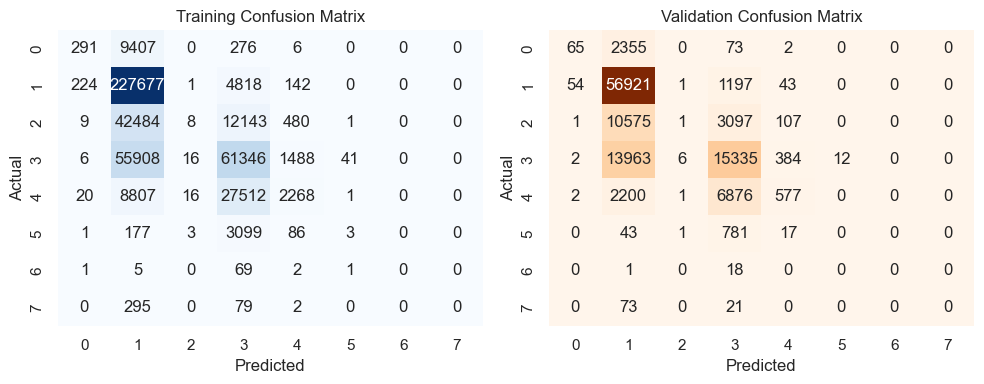

Time taken to run the cell: 43.61 seconds


In [40]:
# Record the start time
start_time = time.time()

lr_model = LogisticRegression(random_state=42, max_iter=500)

# Fit the model to the training data
lr_model.fit(X_train_final, y_train_encoded)

# Predict on the training and validation data
y_pred_lr_train = lr_model.predict(X_train_final)
y_pred_lr_val = lr_model.predict(X_val_final)

# Evaluate the model
metrics(y_train_encoded, y_pred_lr_train, y_val_encoded, y_pred_lr_val)

# Record the end time and calculate duration
end_time = time.time()
print(f"Time taken to run the cell: {end_time - start_time:.2f} seconds")


### 5.1.2. Decision Tree <a class="anchor" id="sub_section_5_1_2"></a>

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      9980
           1       0.93      0.99      0.96    232862
           2       0.98      0.72      0.83     55125
           3       1.00      0.98      0.99    118805
           4       1.00      1.00      1.00     38624
           5       1.00      1.00      1.00      3369
           6       1.00      1.00      1.00        78
           7       1.00      0.95      0.98       376

    accuracy                           0.95    459219
   macro avg       0.97      0.94      0.95    459219
weighted avg       0.96      0.95      0.95    459219

_________________________

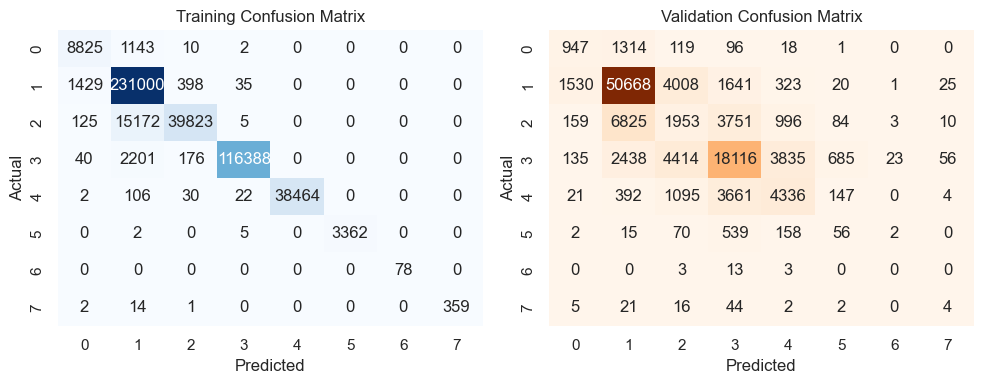

Time taken for Decision Tree: 3.45 seconds


In [41]:
# Decision Tree Classifier
start_time = time.time()

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_final, y_train_encoded)

# Predictions
y_pred_dt_train = dt_model.predict(X_train_final)
y_pred_dt_val = dt_model.predict(X_val_final)

# Evaluate the model
metrics(y_train_encoded, y_pred_dt_train, y_val_encoded, y_pred_dt_val)

# Execution Time
end_time = time.time()
print(f"Time taken for Decision Tree: {end_time - start_time:.2f} seconds")


### 5.1.3. Random Forest <a class="anchor" id="sub_section_5_1_3"></a>

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      9980
           1       0.93      0.99      0.96    232862
           2       0.97      0.74      0.84     55125
           3       1.00      0.98      0.99    118805
           4       1.00      1.00      1.00     38624
           5       1.00      1.00      1.00      3369
           6       1.00      1.00      1.00        78
           7       1.00      0.95      0.98       376

    accuracy                           0.95    459219
   macro avg       0.97      0.93      0.95    459219
weighted avg       0.96      0.95      0.95    459219

_________________________

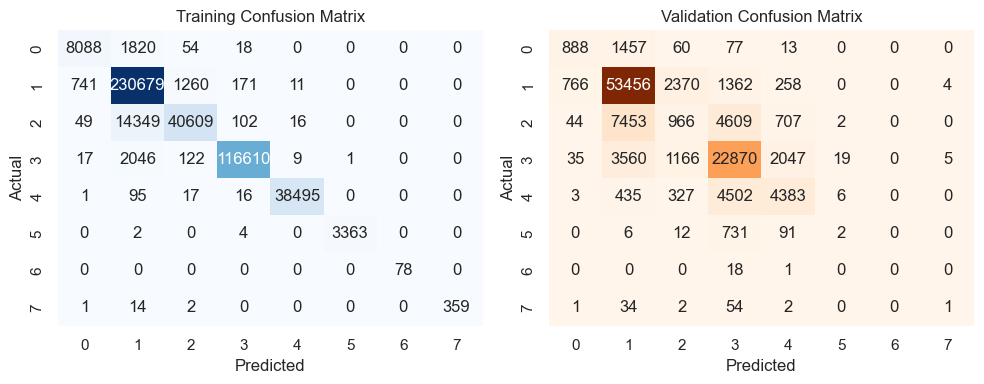

Time taken for Random Forest: 91.29 seconds


In [42]:
# Random Forest Classifier
start_time = time.time()

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_final, y_train_encoded)

# Predictions
y_pred_rf_train = rf_model.predict(X_train_final)
y_pred_rf_val = rf_model.predict(X_val_final)

# Evaluate the model
metrics(y_train_encoded, y_pred_rf_train, y_val_encoded, y_pred_rf_val)

# Execution Time
end_time = time.time()
print(f"Time taken for Random Forest: {end_time - start_time:.2f} seconds")


### 5.1.4. XGBoost <a class="anchor" id="sub_section_5_1_4"></a>

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.35      0.46      9980
           1       0.82      0.98      0.89    232862
           2       0.50      0.03      0.05     55125
           3       0.70      0.83      0.76    118805
           4       0.66      0.50      0.57     38624
           5       0.95      0.02      0.03      3369
           6       1.00      0.50      0.67        78
           7       0.90      0.24      0.38       376

    accuracy                           0.76    459219
   macro avg       0.77      0.43      0.48    459219
weighted avg       0.73      0.76      0.71    459219

_________________________

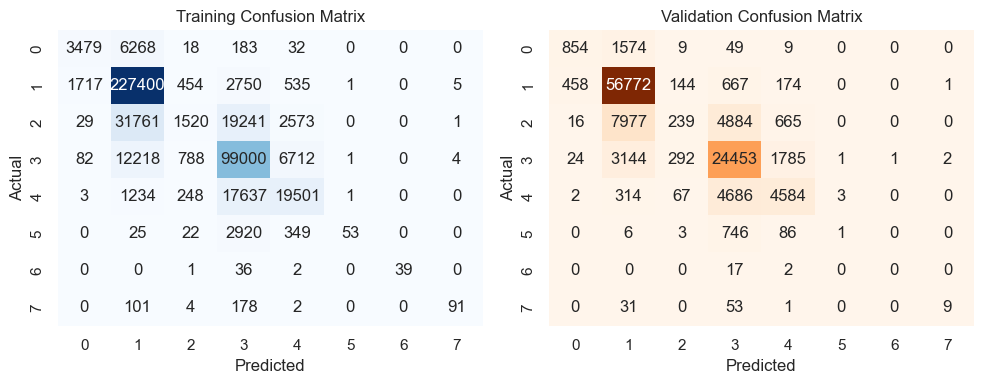

Time taken for XGBoost: 11.39 seconds


In [43]:
import xgboost as xgb

# XGBoost Classifier
start_time = time.time()

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_final, y_train_encoded)

# Predictions
y_pred_xgb_train = xgb_model.predict(X_train_final)
y_pred_xgb_val = xgb_model.predict(X_val_final)

# Evaluate the model
metrics(y_train_encoded, y_pred_xgb_train, y_val_encoded, y_pred_xgb_val)

# Execution Time
end_time = time.time()
print(f"Time taken for XGBoost: {end_time - start_time:.2f} seconds")


While the models in this section provide insight into their general performance, their direct application to the full dataset does not address class imbalance effectively. To tackle this issue, we propose a hierarchical classification strategy in the Open-Ended Section. This staged approach aims to improve predictions by dividing the classification problem into smaller, more balanced tasks, potentially outperforming these baseline models.

# 6. Loading the Results <a class="anchor" id="chapter6"></a>

In [44]:
import os
import pickle

# Create the directory if it doesn't exist
save_dir = "../processed_datasets/"
os.makedirs(save_dir, exist_ok=True)

# Save the XGBoost model
model_path = os.path.join(save_dir, 'xgb_model_notebook7.pkl')
with open(model_path, 'wb') as file:
    pickle.dump(xgb_model, file)

print(f"Model saved at: {model_path}")

Model saved at: ../processed_datasets/xgb_model_notebook7.pkl
